# Titanic EDA and ML

In [1]:
# import all needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Display all CSV files in the current direction
txtfiles = []
for file in glob.glob("*.csv"):
    txtfiles.append(file)
txtfiles

['test.csv', 'train.csv', 'gender_submission.csv']

In [3]:
# read training data from csv file using pandas and display first 10 rows
train_data = pd.read_csv('./train.csv')
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# read testing dat from csv file 
test_data = pd.read_csv('./test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# merge training and testing data to apply all preprocessing on all of t them
df = pd.concat([train_data, test_data])

# reset index
df.reset_index(drop=True, inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print("train_data shape({})\ntest_data shape({})\ndf shape({})"\
      .format(train_data.shape,test_data.shape,df.shape))

train_data shape((891, 12))
test_data shape((418, 11))
df shape((1309, 12))


In [7]:
# check for duplicates
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


## Check for missing values

<AxesSubplot:>

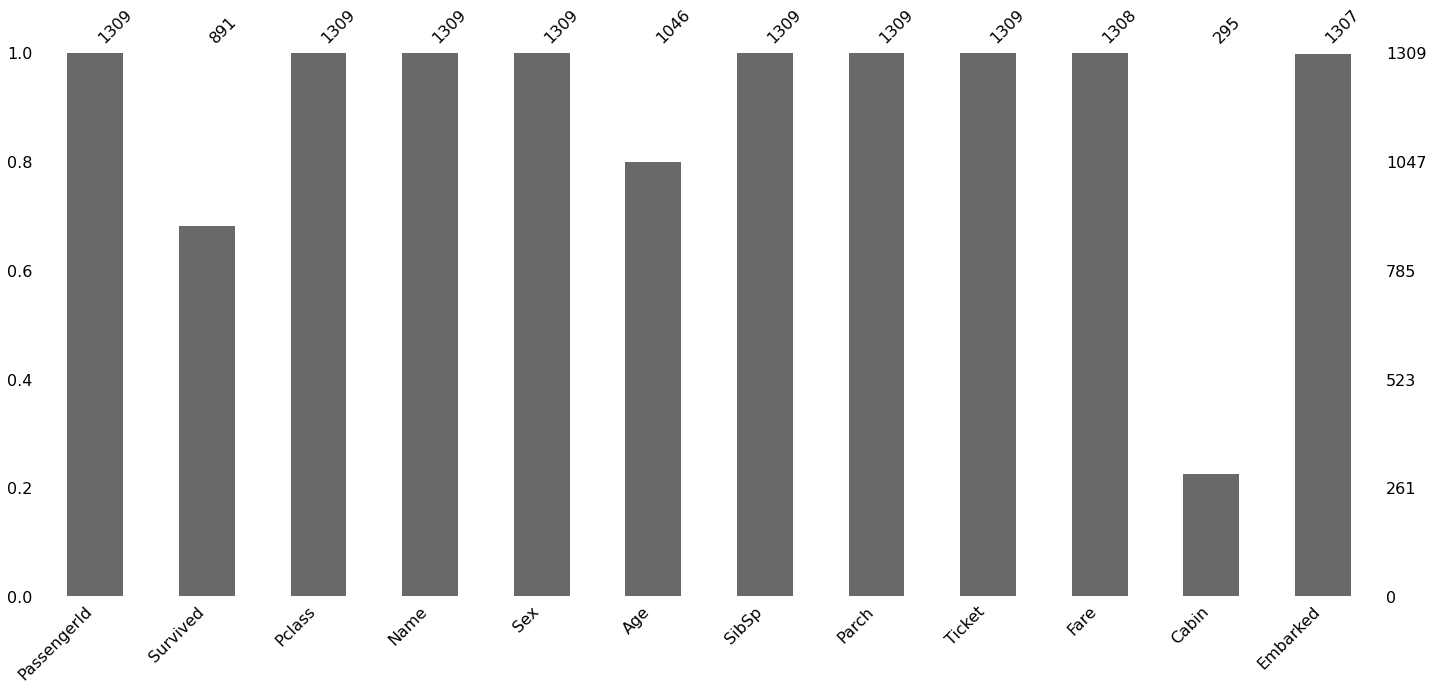

In [9]:
msno.bar(df)

<AxesSubplot:>

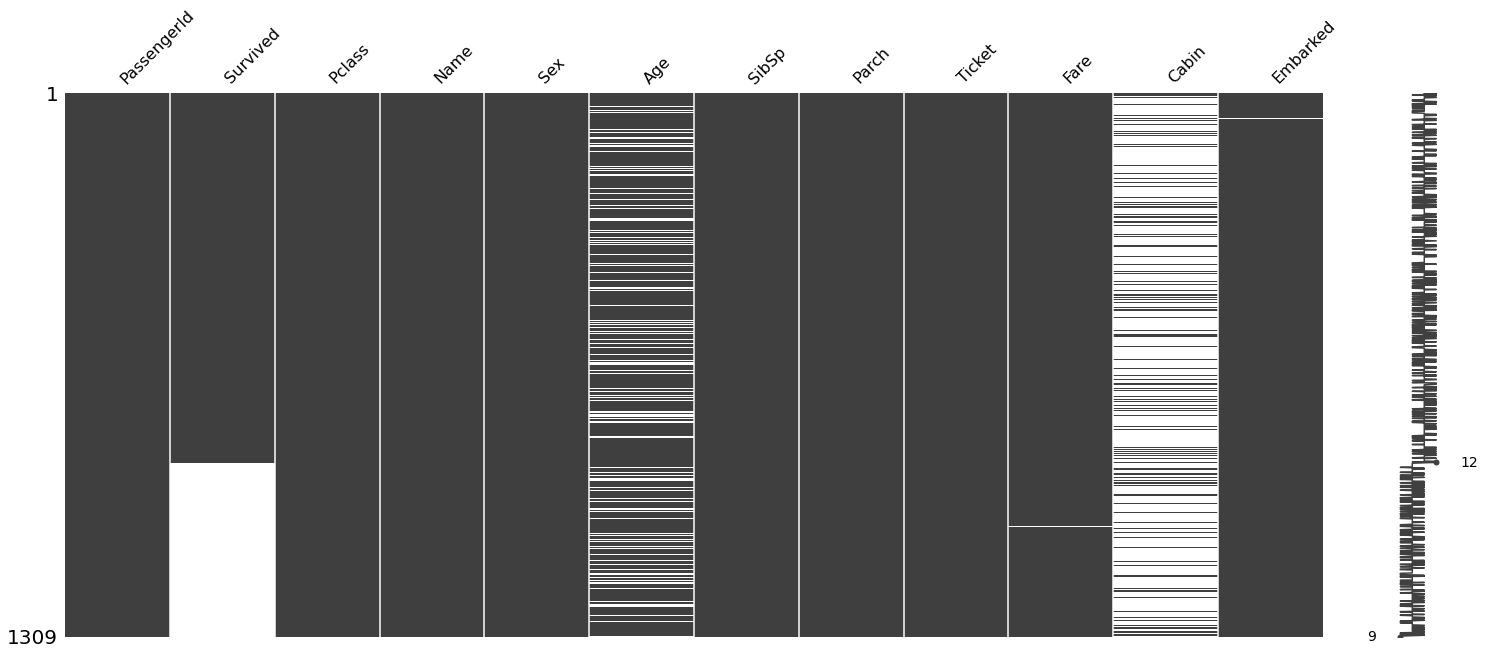

In [10]:
msno.matrix(df)

## Name Feature

In [11]:
# get all titles from name column
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [12]:
df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [13]:
# map most 3 frequencies title with 0,1,2 and others with 3
others = ['Master', 'Rev', 'Dr', 'Col', 'Mlle', 'Major',\
          'Ms', 'Lady', 'Sir', 'Mme', 'Don', 'Capt', 'Countess', 'Jonkheer','Dona']
title_mapping = {'Mr':0, 'Miss':1, 'Mrs':2}
for title in others:
    title_mapping[title] = 3

df['Title'] = df['Title'].map(title_mapping)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2


In [14]:
# remove Name column
df.drop('Name', axis = 1, inplace = True)

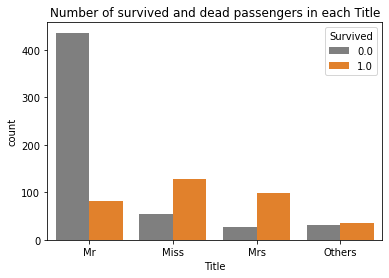

In [15]:
not_survived_color = sns.color_palette()[7]
survived_color = sns.color_palette()[1]
plt.title("Number of survived and dead passengers in each Title")
sns.countplot(data = df, x = 'Title', hue = 'Survived', palette= [not_survived_color, survived_color])
plt.xticks([0,1,2,3], ['Mr','Miss','Mrs', 'Others']);

In [16]:
df.Title.value_counts().index

Int64Index([0, 1, 2, 3], dtype='int64')

### Observation: most passengers has Mr title died

## Age Feature

In [17]:
# fill missing values with median age for each title
df.Age.fillna(df.groupby("Title")['Age'].transform("median"), inplace = True)

In [18]:
df.Age.value_counts()

29.00    206
22.00     93
24.00     47
21.00     41
30.00     40
        ... 
70.50      1
0.67       1
20.50      1
24.50      1
38.50      1
Name: Age, Length: 99, dtype: int64

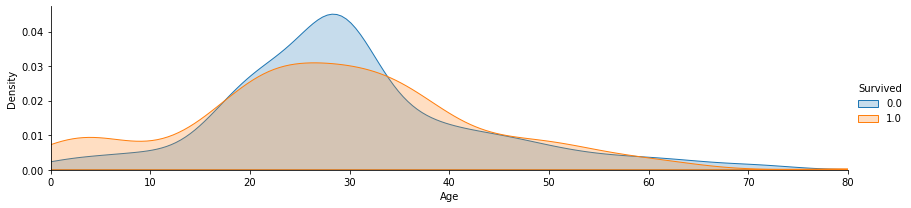

In [19]:
facet = sns.FacetGrid(df, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Age', shade=True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()

### converting numerical age to categorical variable

feature vextor map:
1. child: 0
2. young: 1
3. adult: 2
4. mid_age: 3
5. senior: 4

In [20]:
df.loc[df['Age'] <= 16, 'Age'] = 0
df.loc[np.logical_and(df['Age'] > 16 , (df['Age'] <= 26)), 'Age'] = 1
df.loc[np.logical_and(df['Age'] > 26 , (df['Age'] <= 36)), 'Age'] = 2
df.loc[np.logical_and(df['Age'] > 36 , (df['Age'] <= 62)), 'Age'] = 3
df.loc[df['Age'] > 62, 'Age'] = 4

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Title        1309 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 122.8+ KB


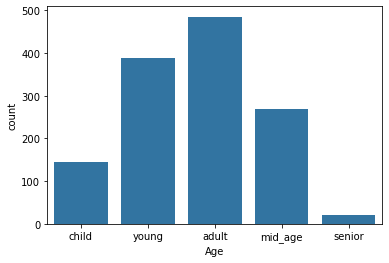

In [22]:
base_color = sns.color_palette()[0]
sns.countplot(df.Age, color=base_color)
plt.xticks([0,1,2,3,4],['child','young','adult','mid_age','senior']);

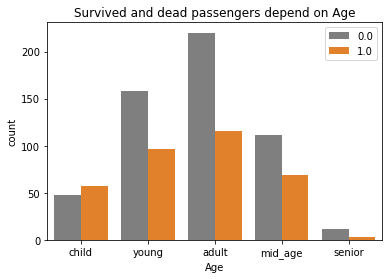

In [23]:
plt.title("Survived and dead passengers depend on Age")
sns.countplot(data = df, x = 'Age', hue = 'Survived', palette= [not_survived_color, survived_color]);
plt.legend(loc='upper right')
plt.xticks([0,1,2,3,4],['child','young','adult','mid_age','senior']);

## Embarked Feature

In [24]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

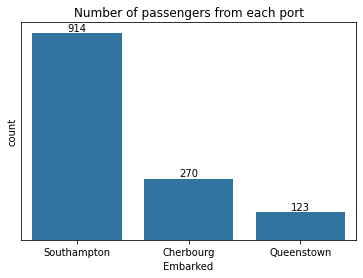

In [25]:
plt.title("Number of passengers from each port")
base_color = sns.color_palette()[0]
ax = sns.countplot(x=df.Embarked, color=base_color, order = df['Embarked'].value_counts(ascending=False).index);
abs_values = df['Embarked'].value_counts(ascending=False).values
ax.set_yticks([])
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_xticklabels(['Southampton','Cherbourg','Queenstown']);

### observation: most passengers ride from the port of Southampton

In [26]:
# i will fill missing data for Embarked column with Southampton
df['Embarked'].fillna('S', inplace = True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,male,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1.0,1,female,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,female,2.0,1,0,113803,53.1000,C123,S,2
4,5,0.0,3,male,2.0,0,0,373450,8.0500,NaN,S,0


## Fare Feature

In [27]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
Title             0
dtype: int64

In [28]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title
PassengerId,1.000000,-0.005007,-0.038354,0.023733,-0.055224,0.008942,0.031428,0.007191
Survived,-0.005007,1.000000,-0.338481,-0.090499,-0.035322,0.081629,0.257307,0.445792
Pclass,-0.038354,-0.338481,1.000000,-0.347271,0.060832,0.018322,-0.558629,-0.144847
Age,0.023733,-0.090499,-0.347271,1.000000,-0.228232,-0.126948,0.143064,-0.175406
SibSp,-0.055224,-0.035322,0.060832,-0.228232,1.000000,0.373587,0.160238,0.282057
Parch,0.008942,0.081629,0.018322,-0.126948,0.373587,1.000000,0.221539,0.329313
Fare,0.031428,0.257307,-0.558629,0.143064,0.160238,0.221539,1.000000,0.167580
Title,0.007191,0.445792,-0.144847,-0.175406,0.282057,0.329313,0.167580,1.000000


In [29]:
df['Fare'].fillna(df.groupby('Pclass')['Fare'].transform('median'), inplace=True)

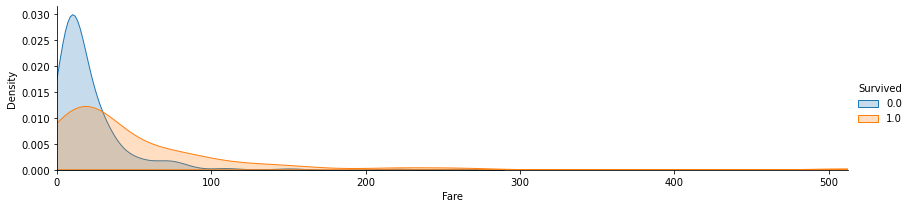

In [30]:
facet = sns.FacetGrid(df, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Fare', shade=True)
facet.set(xlim=(0, df['Fare'].max()))
facet.add_legend();

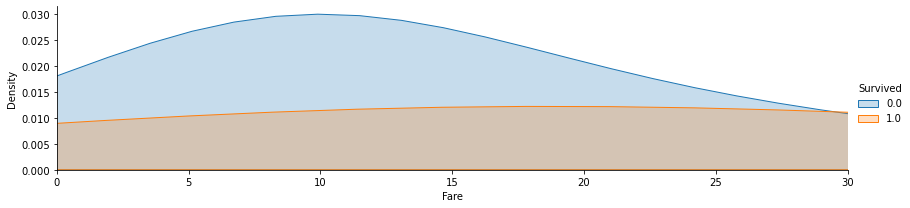

In [31]:
facet = sns.FacetGrid(df, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Fare', shade=True)
facet.set(xlim=(0, df['Fare'].max()))
facet.add_legend()
plt.xlim(0,30);

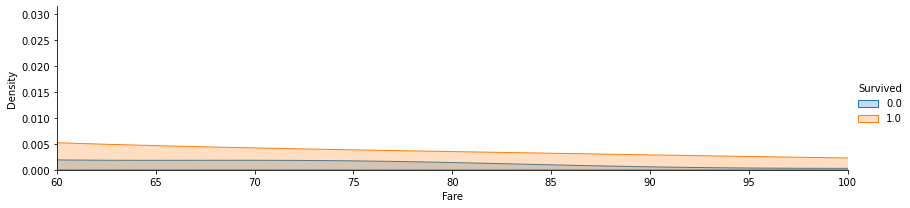

In [32]:
facet = sns.FacetGrid(df, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Fare', shade=True)
facet.set(xlim=(0, df['Fare'].max()))
facet.add_legend()
plt.xlim(60,100);

In [33]:
df.loc[df['Fare'] <= 28, 'Fare'] = 0
df.loc[np.logical_and(df['Fare'] > 29 , (df['Fare'] <= 60)), 'Fare'] = 1
df.loc[np.logical_and(df['Fare'] > 60 , (df['Fare'] <= 100)), 'Fare'] = 2
df.loc[df['Age'] > 100, 'Fare'] = 3

In [34]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,male,1.0,1,0,A/5 21171,0.0,NaN,S,0
1,2,1.0,1,female,3.0,1,0,PC 17599,2.0,C85,C,2
2,3,1.0,3,female,1.0,0,0,STON/O2. 3101282,0.0,NaN,S,1
3,4,1.0,1,female,2.0,1,0,113803,1.0,C123,S,2
4,5,0.0,3,male,2.0,0,0,373450,0.0,NaN,S,0


## Cabin

In [35]:
df.Cabin.value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: Cabin, Length: 186, dtype: int64

In [36]:
# select first char from each observation
df.Cabin = df['Cabin'].str[:1]

In [37]:
# mapping each one for specific value
cabin_mapping = {'A':0, 'B':1, "c":2, "D":3, "E":4, "F":5, "G":6, "T":7}
df['Cabin'] = df['Cabin'].map(cabin_mapping)

In [38]:
# fill missing values with median depending on Pclass
df['Cabin'].fillna(df.groupby('Pclass')['Cabin'].transform('median'), inplace = True)

In [39]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,male,1.0,1,0,A/5 21171,0.0,5.0,S,0
1,2,1.0,1,female,3.0,1,0,PC 17599,2.0,1.0,C,2
2,3,1.0,3,female,1.0,0,0,STON/O2. 3101282,0.0,5.0,S,1
3,4,1.0,1,female,2.0,1,0,113803,1.0,1.0,S,2
4,5,0.0,3,male,2.0,0,0,373450,0.0,5.0,S,0


## Pclass Feature

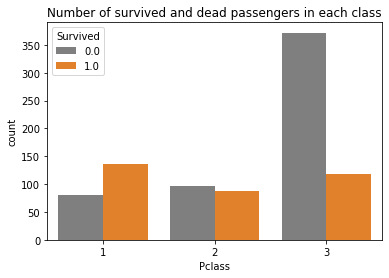

In [40]:
plt.title("Number of survived and dead passengers in each class")
sns.countplot(data = df, x = 'Pclass', hue = 'Survived', palette= [not_survived_color, survived_color]);

### observation: most people died from Class 3

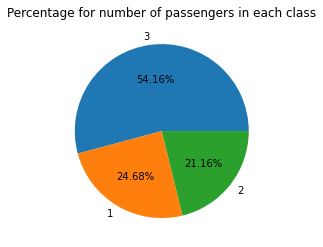

In [41]:
plt.title("Percentage for number of passengers in each class")
gender = df.Pclass.value_counts()
plt.pie(gender, labels = gender.index,autopct='%1.2f%%');

### Observation: 54.16% of passengers from class 3

## Gender Feature

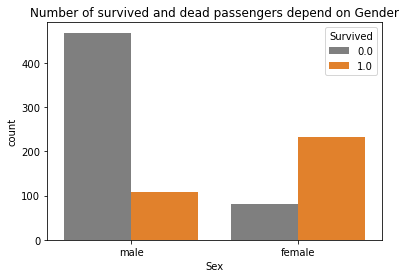

In [42]:
plt.title("Number of survived and dead passengers depend on Gender")
sns.countplot(data = df, x = 'Sex', hue = 'Survived', palette= [not_survived_color, survived_color]);

### observation: number of males who died are huge compared to females


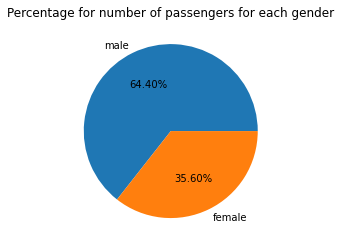

In [43]:
plt.title("Percentage for number of passengers for each gender")
gender = df.Sex.value_counts()
plt.pie(gender, labels = gender.index,autopct='%1.2f%%');

### Observation: 64.4% of passengers males

## Sibsp Feature

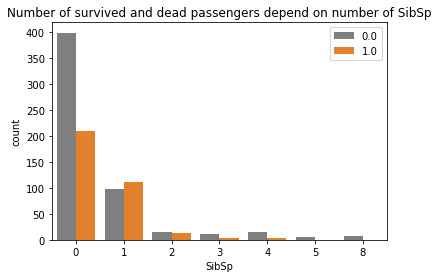

In [44]:
plt.title("Number of survived and dead passengers depend on number of SibSp")
sns.countplot(data = df, x = 'SibSp', hue = 'Survived', palette= [not_survived_color, survived_color])
plt.legend(loc='upper right');

## Parch Feature

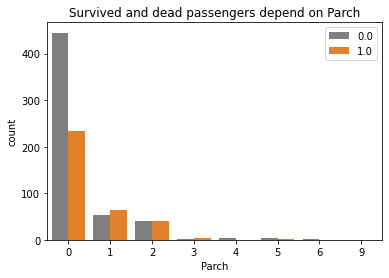

In [45]:
plt.title("Survived and dead passengers depend on Parch")
sns.countplot(data = df, x = 'Parch', hue = 'Survived', palette= [not_survived_color, survived_color]);
plt.legend(loc='upper right');

In [46]:
# check for null values
print("Number of missing values in each feature:\n",df.isnull().sum())

Number of missing values in each feature:
 PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Title            0
dtype: int64


### Cabin feature missing 77.4% for that i will drop this column

In [47]:
# i will drop PassengerId, Name and Cabin columns
df.drop(['PassengerId','Ticket'], axis = 1, inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0.0,3,male,1.0,1,0,0.0,5.0,S,0
1,1.0,1,female,3.0,1,0,2.0,1.0,C,2
2,1.0,3,female,1.0,0,0,0.0,5.0,S,1
3,1.0,1,female,2.0,1,0,1.0,1.0,S,2
4,0.0,3,male,2.0,0,0,0.0,5.0,S,0


In [48]:
# need to map Sex values 0 for female and 1 for male
df['Sex'] = df['Sex'].map({'female':0, 'male':1})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0.0,3,1,1.0,1,0,0.0,5.0,S,0
1,1.0,1,0,3.0,1,0,2.0,1.0,C,2
2,1.0,3,0,1.0,0,0,0.0,5.0,S,1
3,1.0,1,0,2.0,1,0,1.0,1.0,S,2
4,0.0,3,1,2.0,0,0,0.0,5.0,S,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   int64  
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1309 non-null   float64
 7   Cabin     1309 non-null   float64
 8   Embarked  1309 non-null   object 
 9   Title     1309 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 102.4+ KB


In [50]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [51]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop = 'first',sparse=False)
df = pd.concat([df, pd.DataFrame(ohe.fit_transform(df[['Embarked']]), columns= ['Embarked_Q','Embarked_S'])],axis = 1)
print(ohe.categories_)
df.head(1)

[array(['C', 'Q', 'S'], dtype=object)]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Embarked_Q,Embarked_S
0,0.0,3,1,1.0,1,0,0.0,5.0,S,0,0.0,1.0


In [52]:
df.drop('Embarked', inplace = True, axis = 1)
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title,Embarked_Q,Embarked_S
0,0.0,3,1,1.0,1,0,0.0,5.0,0,0.0,1.0


In [53]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title,Embarked_Q,Embarked_S
count,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.383838,2.294882,0.644003,1.721925,0.498854,0.385027,12.869586,4.129106,0.717341,0.093965,0.699771
std,0.486592,0.837836,0.478997,0.966084,1.041658,0.865560,52.547299,1.613964,0.969495,0.291891,0.458533
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,2.000000,1.000000,0.000000,1.000000,5.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,4.000000,8.000000,9.000000,512.329200,7.000000,3.000000,1.000000,1.000000


In [54]:
# split training data from testing data (all testing data Survived column will be null)
df_train = df[~df['Survived'].isnull()]
y = df_train['Survived']
X = df_train.drop('Survived', axis = 1)
df_test = df[df['Survived'].isnull()].drop('Survived', axis = 1)
print("training data shape: {}".format(df_train.shape))
print("testing data shape: {}".format(df_test.shape))

training data shape: (891, 11)
testing data shape: (418, 10)


In [55]:
# using standardscaler for training and testing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

scaler = StandardScaler()
scaler.fit(df_test)
df_test = scaler.transform(df_test)

## SVM Model

In [58]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
model = SVC(random_state = 42)
parameters = {'kernel':['poly', 'rbf'],'C':[0.1, 1, 3,6, 10, 13]}
scorer = make_scorer(accuracy_score)
# Create the object.
grid_obj = GridSearchCV(model, parameters, scoring=scorer)
# Fit the data
grid_fit = grid_obj.fit(X, y)
best_model = grid_fit.best_estimator_
best_predictions = best_model.predict(X)
predicted = best_model.predict(df_test).astype(int)
print("Final accuracy score on the training data: {:.4f}".format(accuracy_score(y, best_predictions)))
predicted

Final accuracy score on the training data: 0.8507


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [59]:
output = pd.DataFrame({'passengerId':test_data.PassengerId,'Survived': predicted})
output.to_csv('my_submission.csv',index = False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
